This section downloads the data required for the project. It assumes the user has set up Kaggle credentials (API key) correctly, so the command can authenticate and fetch the dataset

In [1]:
! kaggle datasets download -d tejashvi14/tour-travels-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/tour-travels-customer-churn-prediction
License(s): CC0-1.0
  0% 0.00/3.45k [00:00<?, ?B/s]
100% 3.45k/3.45k [00:00<00:00, 3.86MB/s]


Many datasets on Kaggle are stored in compressed .zip format to reduce file size. Unzipping is necessary to access the actual data files inside
If the ZIP file contains a file called Customertravel.csv, this file will be extracted and ready for loading into a DataFrame in the subsequent steps.

In [2]:
! unzip /content/tour-travels-customer-churn-prediction.zip

Archive:  /content/tour-travels-customer-churn-prediction.zip
  inflating: Customertravel.csv      


# Data Prepration

1. pandas (imported as pd)
Purpose: For working with data in structured formats like tables (e.g., CSV files, Excel sheets).
Why it's used here:
Reading the dataset from a .csv file.
Transforming it into a DataFrame (a tabular structure similar to a spreadsheet).
Easily manipulating, filtering, or summarizing data.
2. numpy (imported as np)
Purpose: For performing numerical operations efficiently.
Why it's used here:
Handling numerical data types and arrays.
Used in preprocessing and calculations (e.g., normalization, matrix operations).
Creating helper tools like masks for visualization (as seen in heatmaps).
3. matplotlib.pyplot (imported as plt)
Purpose: For creating visualizations and plots.
Why it's used here:
Creating various types of charts (e.g., histograms, scatter plots).
Customizing and saving plots (like Distplot.png, Boxplot.png).
4. seaborn (imported as sns)
Purpose: A higher-level interface for creating visually attractive statistical plots.
Why it's used here:
Building more complex visualizations (e.g., pair plots, heatmaps).
Adding context to plots using colors and themes.
Specifically used for exploratory data analysis (EDA) to understand patterns and relationships in the data.
5. LabelEncoder (from sklearn.preprocessing)
Purpose: To convert categorical variables into numeric labels.
Why it's used here:
Machine learning algorithms typically work with numerical data. For example, converting FrequentFlyer from "Yes"/"No" to 1/0.
Simplifies preprocessing by automating the conversion



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder

Instead of importing the whole sklearn.preprocessing library, only LabelEncoder is imported because that's the only tool needed here.
This approach:
Keeps the code cleaner.
Reduces memory usage.


In [4]:
data = pd.read_csv('/content/Customertravel.csv')
df = pd.DataFrame(data)
df

Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                           No               No       0  
4                           No               No       0  
..                         ...              ...     ...  
949                         No               No       0  
950                         No              Yes       0  
951                         No               No       0  
952                        Yes              Yes       0  
953                         No               No       0  

[954 rows x 7 columns]

df.info() Means to print the info of our data

sometimes we can find our issues by seaing the info

but if you use a clean data it may dont have problem


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


This loop iterates over each column in the DataFrame df and prints the column name along with its unique values. df.columns returns a list of all column names in the DataFrame. df[i].unique() returns an array of unique values for each column i

In [6]:
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

By seeing the unique values in each column, you can better understand the data, especially the categorical columns. For example, this step might reveal the categories within AnnualIncomeClass (Low Income, Middle Income, etc.) and confirm that the Target column has two classes (0 and 1 for churn prediction).

In [7]:
for i in df.columns :
  print(i,df[i].unique())

Age [34 37 30 27 36 28 35 31 38 33 29]
FrequentFlyer ['No' 'Yes' 'No Record']
AnnualIncomeClass ['Middle Income' 'Low Income' 'High Income']
ServicesOpted [6 5 3 2 1 4]
AccountSyncedToSocialMedia ['No' 'Yes']
BookedHotelOrNot ['Yes' 'No']
Target [0 1]


In [8]:
le = LabelEncoder()

Explanation:
le = LabelEncoder() initializes an instance of LabelEncoder.
The next four lines apply label encoding to each specified column. le.fit_transform() encodes the categorical values into integers, where each unique category in a column is assigned a unique integer.

Purpose: Label encoding converts categorical values to numeric codes, which are necessary for most machine learning models. For example:
In FrequentFlyer, No might be encoded as 0 and Yes as 1.
Similarly, other categorical columns are converted to numeric values so the machine learning algorithms can process them.

In [9]:
df['FrequentFlyer'] = le.fit_transform(df['FrequentFlyer'])
df['AnnualIncomeClass'] = le.fit_transform(df['AnnualIncomeClass'])
df['AccountSyncedToSocialMedia'] = le.fit_transform(df['AccountSyncedToSocialMedia'])
df['BookedHotelOrNot'] = le.fit_transform(df['BookedHotelOrNot'])

In [10]:
# df['FrequentFlyer'] = pd.Categorical(df['FrequentFlyer'])
# df['AnnualIncomeClass'] = pd.Categorical(df['AnnualIncomeClass'])
# df['AccountSyncedToSocialMedia'] = pd.Categorical(df['AccountSyncedToSocialMedia'])
# df['BookedHotelOrNot'] = pd.Categorical(df['BookedHotelOrNot'])
# df['Target'] = pd.Categorical(df['Target'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         954 non-null    int64
 1   FrequentFlyer               954 non-null    int64
 2   AnnualIncomeClass           954 non-null    int64
 3   ServicesOpted               954 non-null    int64
 4   AccountSyncedToSocialMedia  954 non-null    int64
 5   BookedHotelOrNot            954 non-null    int64
 6   Target                      954 non-null    int64
dtypes: int64(7)
memory usage: 52.3 KB


In [12]:
df

Age  FrequentFlyer  AnnualIncomeClass  ServicesOpted  \
0     34              0                  2              6   
1     34              2                  1              5   
2     37              0                  2              3   
3     30              0                  2              2   
4     30              0                  1              1   
..   ...            ...                ...            ...   
949   31              2                  1              1   
950   30              0                  2              5   
951   37              0                  2              4   
952   30              0                  1              1   
953   31              2                  0              1   

     AccountSyncedToSocialMedia  BookedHotelOrNot  Target  
0                             0                 1       0  
1                             1                 0       1  
2                             1                 0       0  
3                             0                 0       0  
4                             0                 0       0  
..                          ...               ...     ...  
949                           0                 0       0  
950                           0                 1       0  
951                           0                 0       0  
952                           1                 1       0  
953                           0                 0       0  

[954 rows x 7 columns]

# Visuallization


A pairplot is a visualization that shows the pairwise relationships between all numeric variables in a dataset. Each feature is plotted against every other feature in a grid format, making it a useful tool for identifying correlations, clusters, and potential patterns. Diagonal plots often show the distribution of individual features.

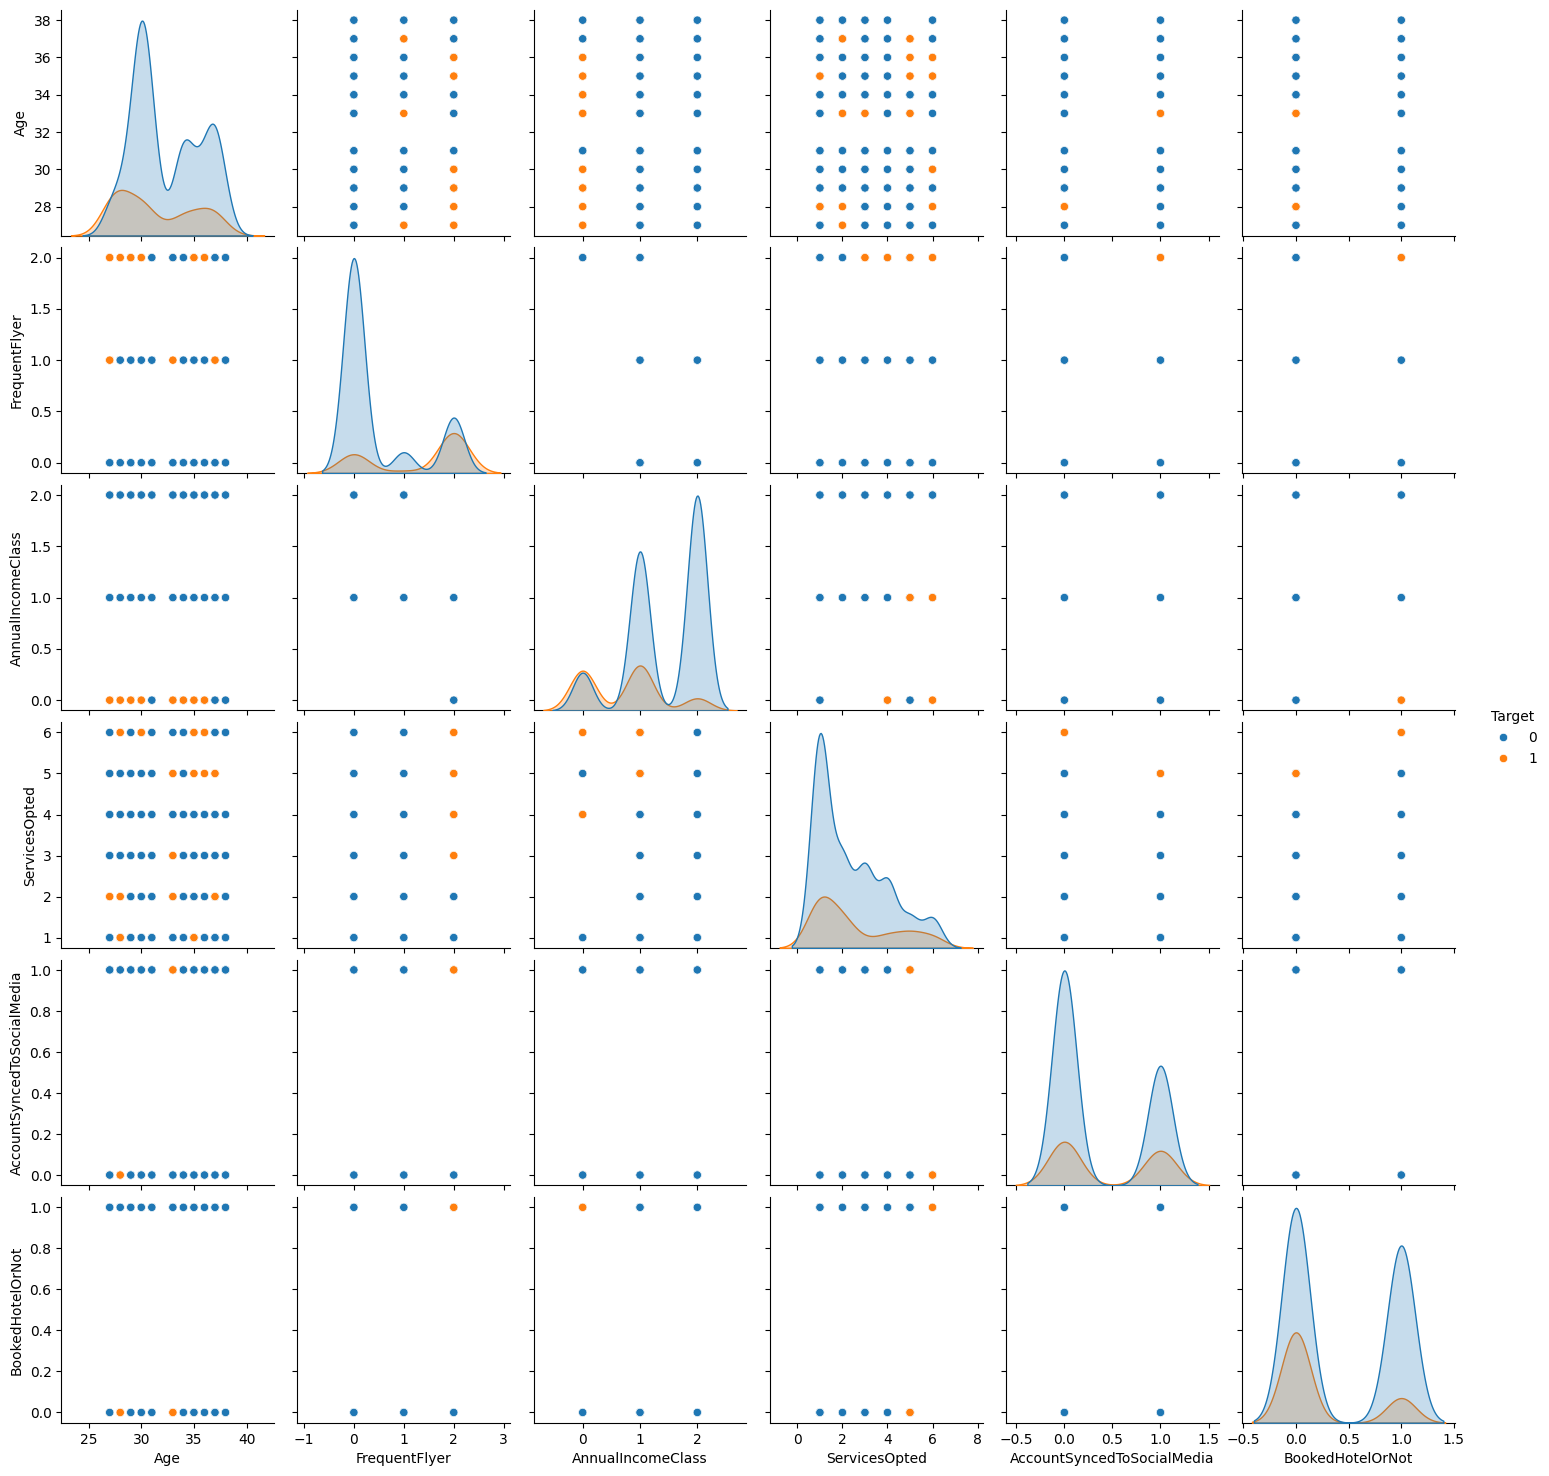

In [ ]:
sns.pairplot(df, hue='Target')

Age and Target:

There appears to be a slight trend where customers in certain age groups (mid to late 30s) might have a different distribution of Target (returning vs. non-returning) compared to younger customers.
The distribution indicates that the likelihood of returning might vary slightly with age.
ServicesOpted and Target:

ServicesOpted appears to have some relationship with the Target variable, as we can see different clustering patterns between the classes.
Higher numbers of ServicesOpted may suggest a higher tendency to return (orange dots for Target=1).
FrequentFlyer and Target:

Frequent flyer status has some visual indication of influence on the target variable. The data points are more dispersed across different values for the returning customers (orange dots).
This implies that FrequentFlyer could be a useful feature for predicting customer return.
Categorical Features:

Since categorical features were encoded, they appear as discrete points in the scatter plots.
For instance, BookedHotelOrNot has distinct clusters at 0 and 1, showing how this feature might correlate with the target.

--------------------------------------------------------
This pair plot is useful for understanding the potential relationships and interactions between features that might be predictive of whether a mushroom is poisonous or edible. You might use this information to select or engineer features for a machine learning model. For example, features showing minimal overlap in their distributions could be prioritized


A distribution plot (or histogram with a KDE curve) shows the frequency distribution of each feature in the dataset, providing insights into how values are spread across different ranges for each variable.

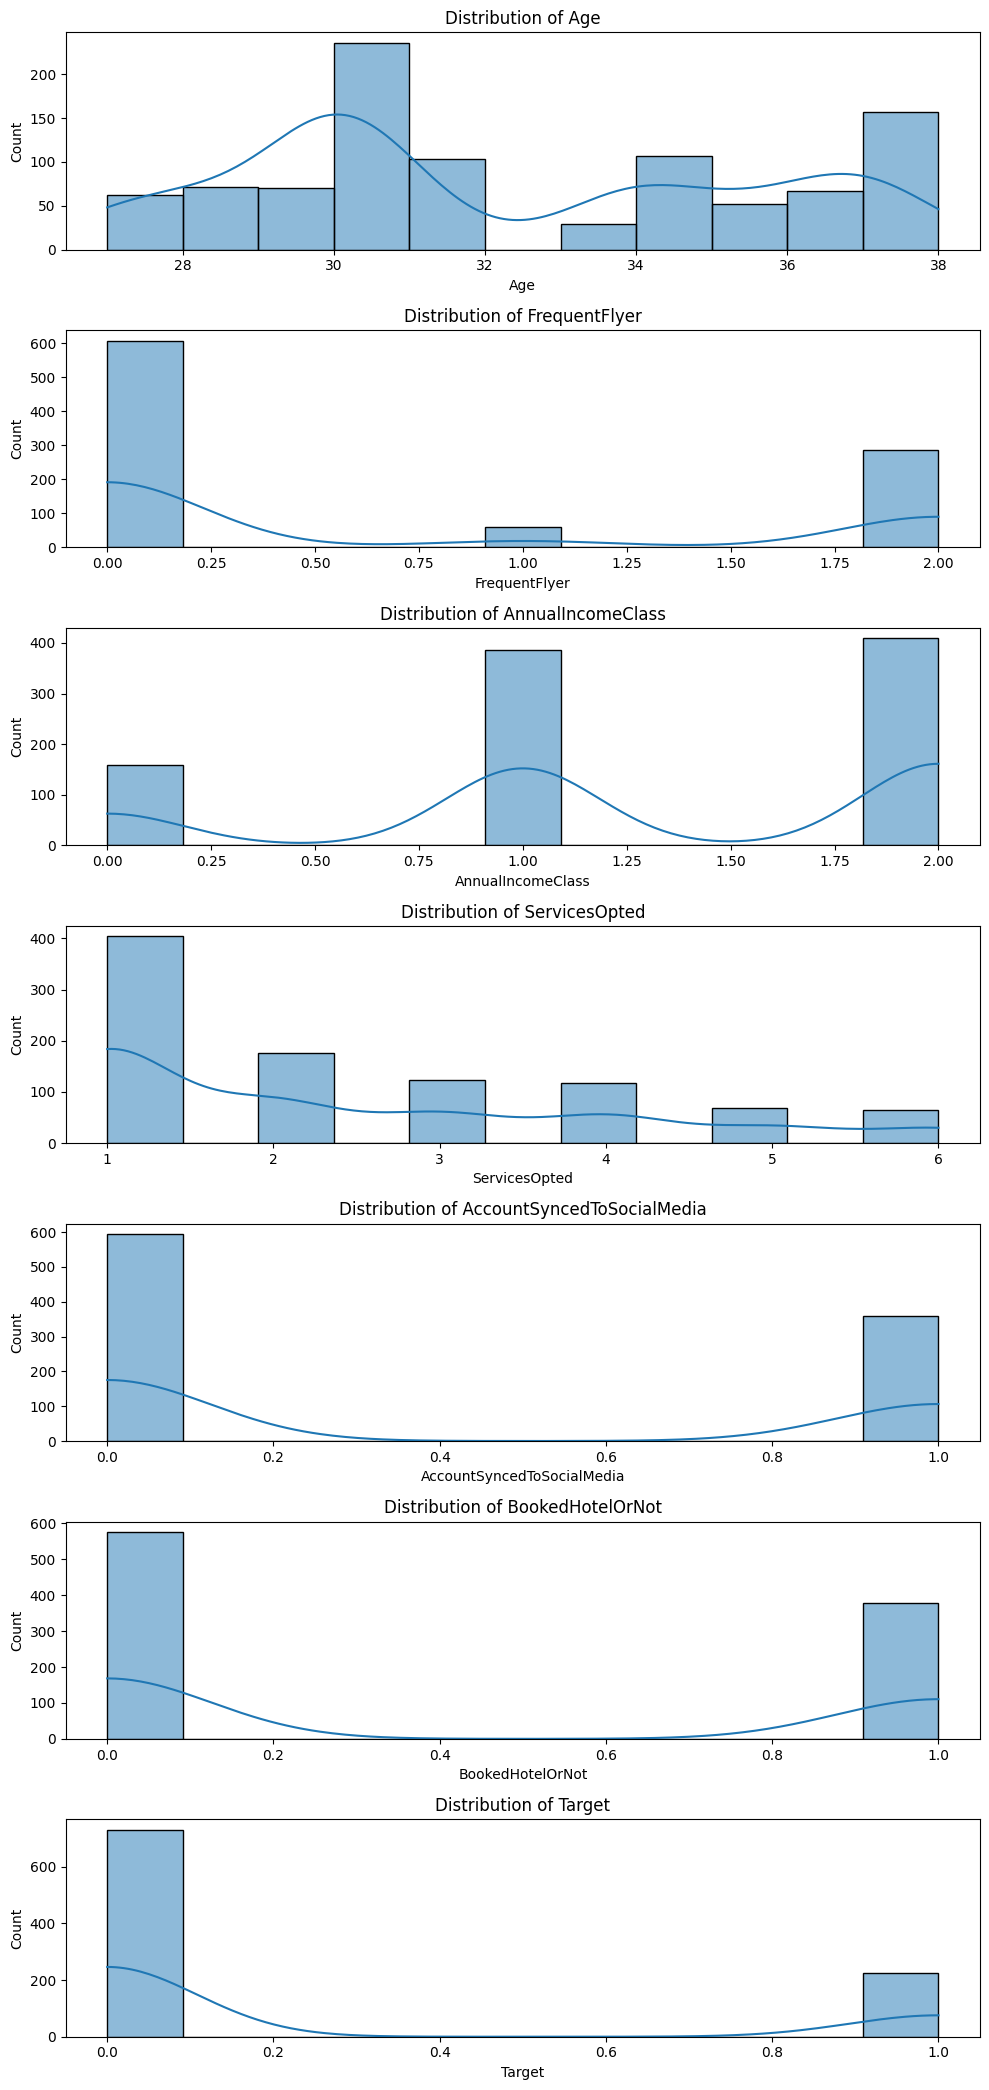

In [ ]:
num_columns = len(df.columns)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, num_columns * 3))

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.savefig('Distplot.png')
plt.show()

A distribution plot is helpful for understanding the shape, spread, and concentration of data for each feature:

Skewed Distributions: Features like ServicesOpted and AccountSyncedToSocialMedia show skewness, with more data concentrated at lower values.
Binary Variables: Variables like FrequentFlyer, AccountSyncedToSocialMedia, and BookedHotelOrNot are binary, with imbalances between classes that may affect model predictions.
Potential Data Imbalance: The Target variable shows class imbalance, which could impact the model's ability to predict correctly for the minority class (1, representing returning customers).

A box plot is a standardized way of displaying data distribution based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Outliers are often marked as individual points beyond the whiskers (typically 1.5 times the interquartile range from Q1 and Q3).

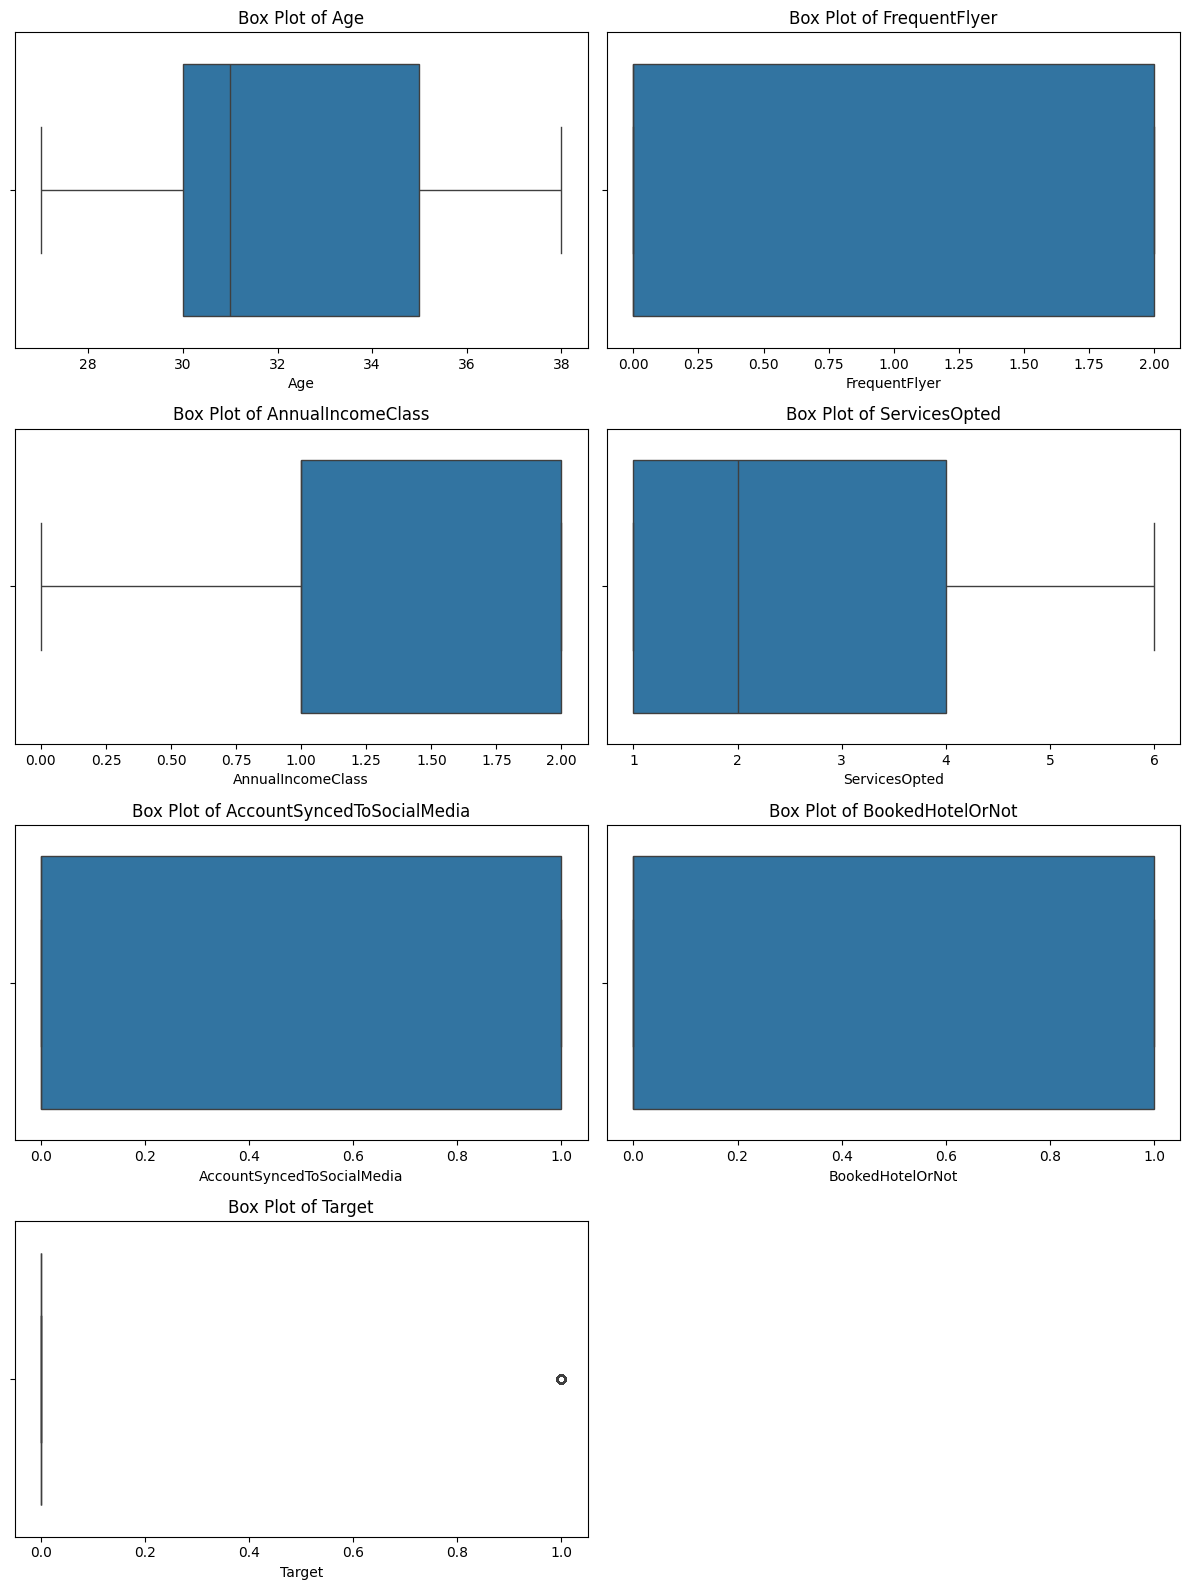

In [ ]:
num_columns = 2
num_rows = (len(df.columns) + 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, num_rows * 4))
axes = axes.flatten()


for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Boxplot.png')
plt.show()

Feature Imbalance: Many features, particularly binary ones (FrequentFlyer, AccountSyncedToSocialMedia, BookedHotelOrNot), are imbalanced, with most values concentrated in one category.
Potential Data Imbalance in Target: The Target variable has an imbalance, with more customers who do not return. This may require handling techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights.


A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the matrix represents the correlation (or relationship strength) between two variables, ranging from -1 to +1:

+1 indicates a perfect positive correlation (as one variable increases, the other does too).
0 means no correlation (no consistent relationship).
-1 indicates a perfect negative correlation (as one variable increases, the other decreases).

In [ ]:
corr = df.corr()

corr

Age  FrequentFlyer  AnnualIncomeClass  \
Age                         1.000000       0.034671           0.053149   
FrequentFlyer               0.034671       1.000000          -0.709380   
AnnualIncomeClass           0.053149      -0.709380           1.000000   
ServicesOpted              -0.012422      -0.164981           0.236364   
AccountSyncedToSocialMedia -0.016367      -0.084590           0.034744   
BookedHotelOrNot            0.024281      -0.189947           0.250833   
Target                     -0.131534       0.418672          -0.418092   

                            ServicesOpted  AccountSyncedToSocialMedia  \
Age                             -0.012422                   -0.016367   
FrequentFlyer                   -0.164981                   -0.084590   
AnnualIncomeClass                0.236364                    0.034744   
ServicesOpted                    1.000000                   -0.148655   
AccountSyncedToSocialMedia      -0.148655                    1.000000   
BookedHotelOrNot                 0.155886                   -0.100104   
Target                           0.038646                    0.073831   

                            BookedHotelOrNot    Target  
Age                                 0.024281 -0.131534  
FrequentFlyer                      -0.189947  0.418672  
AnnualIncomeClass                   0.250833 -0.418092  
ServicesOpted                       0.155886  0.038646  
AccountSyncedToSocialMedia         -0.100104  0.073831  
BookedHotelOrNot                    1.000000 -0.206055  
Target                             -0.206055  1.000000


A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the matrix represents the correlation (or relationship strength) between two variables, ranging from -1 to +1:

+1 indicates a perfect positive correlation (as one variable increases, the other does too).
0 means no correlation (no consistent relationship).
-1 indicates a perfect negative correlation (as one variable increases, the other decreases).

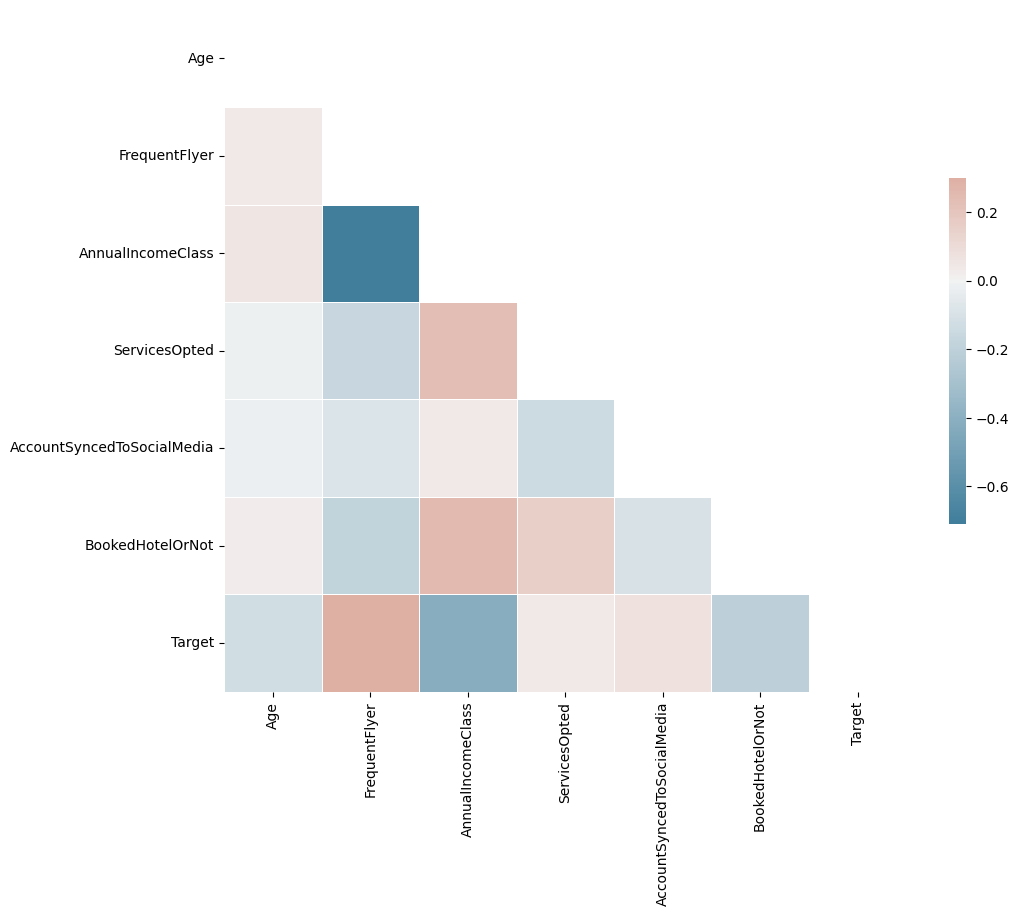

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('CorelationMatrix.png')
plt.show()

Significant Positive Correlations:

FrequentFlyer and AnnualIncomeClass have a moderate positive correlation, which may suggest that frequent flyers tend to have a certain income class.
Target has moderate correlations with FrequentFlyer, AnnualIncomeClass, and BookedHotelOrNot, which could imply these features are valuable in predicting customer return.
Negative Correlations:

There are negative correlations between Target and some other features, which might indicate inverse relationships.

--------------------------------------------------------------------------------
Annual Income Class and Frequent Flyer stand out as potentially important predictors for the target.
Services Opted and Booked Hotel or Not have weaker but potentially meaningful relationships with the target.
Account Synced to Social Media and Age show low correlations with the target and other features, suggesting they might be less impactful

# Preprocessing

To prepare the data for classification, several preprocessing steps were applied. First, numerical features like Age and ServicesOpted were standardized using StandardScaler, bringing them to a common scale. This helps improve model performance, particularly for algorithms sensitive to feature scales. Categorical features, specifically AnnualIncomeClass, were one-hot encoded, allowing the model to interpret categories without assuming an order between them.

An EngagementScore feature was created by combining the binary features FrequentFlyer, AccountSyncedToSocialMedia, and BookedHotelOrNot. This new feature provides a single metric of customer engagement, which can be informative for predicting return likelihood. To address the imbalance in the target variable (Target), SMOTE was applied, generating synthetic samples for the minority class to create a more balanced dataset. Finally, the data was split into training and testing sets, ensuring an unbiased evaluation of the model's performance.

These preprocessing steps enhance data quality and balance, creating a more effective foundation for training a classification model.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

normalization

In [15]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Support Vector Machine (SVM)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

classification_report and confusion_matrix: Tools for evaluating model performance.
SVC: The SVM classifier from sklearn.
GridSearchCV: Automates hyperparameter tuning by testing parameter combinations

Train an SVM model to classify data into edible/poisonous categories.
Steps:
Define hyperparameters (C, kernel, etc.).
Use GridSearchCV to find the best parameters.
Train the optimal SVM model.
Evaluate using metrics like precision, recall, and accuracy.
Visualize model performance.
Key Takeaway: SVM finds an optimal hyperplane to classify data, and hyperparameter tuning (e.g., C, kernel) improves its ability to generalize

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'coef0': [0.0, 0.1, 0.5, 1],
}

In [ ]:
svm = SVC()

In [ ]:
svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', return_train_score=True, verbose=3)

In [ ]:
svm_grid.fit(x, y)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear;, score=(train=0.809, test=0.796) total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear;, score=(train=0.832, test=0.801) total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear;, score=(train=0.814, test=0.812) total time=   0.0s
[CV 4/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear;, score=(train=0.815, test=0.817) total time=   0.0s
[CV 5/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=linear;, score=(train=0.818, test=0.821) total time=   0.0s
[CV 1/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=rbf;, score=(train=0.803, test=0.785) total time=   0.0s
[CV 2/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=rbf;, score=(train=0.817, test=0.806) total time=   0.0s
[CV 3/5] END C=0.1, coef0=0.0, degree=2, gamma=scale, kernel=rbf;, score=(train=0.801, test=0.7

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 0.5, 1],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
svm_grid.best_params_

{'C': 10, 'coef0': 0.5, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
svm_grid.best_score_

0.8836373656654726

In [ ]:
best_svm = SVC(C=10, coef0=0.5, degree=4, gamma='scale', kernel='poly')

In [ ]:
best_svm.fit(x_train, y_train)
y_pred_test_svm = best_svm.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       153
           1       0.63      0.63      0.63        38

    accuracy                           0.85       191
   macro avg       0.77      0.77      0.77       191
weighted avg       0.85      0.85      0.85       191



In [ ]:
y_pred_train_svm = best_svm.predict(x_train)
print(classification_report(y_train,y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       577
           1       0.87      0.81      0.84       186

    accuracy                           0.92       763
   macro avg       0.91      0.88      0.89       763
weighted avg       0.92      0.92      0.92       763



In [ ]:
df_svm = pd.DataFrame(x_test)
df_svm['Predicted'] = y_pred_test_svm

pd.DataFrame(x_test): Converts the test data into a DataFrame for easy visualization.
Adding Predictions: A new column ('Predicted') is added to include predicted class labels.
sns.pairplot:
Creates pairwise scatter plots of features in the test data.
Uses color (hue='Predicted') to differentiate predicted classes visually

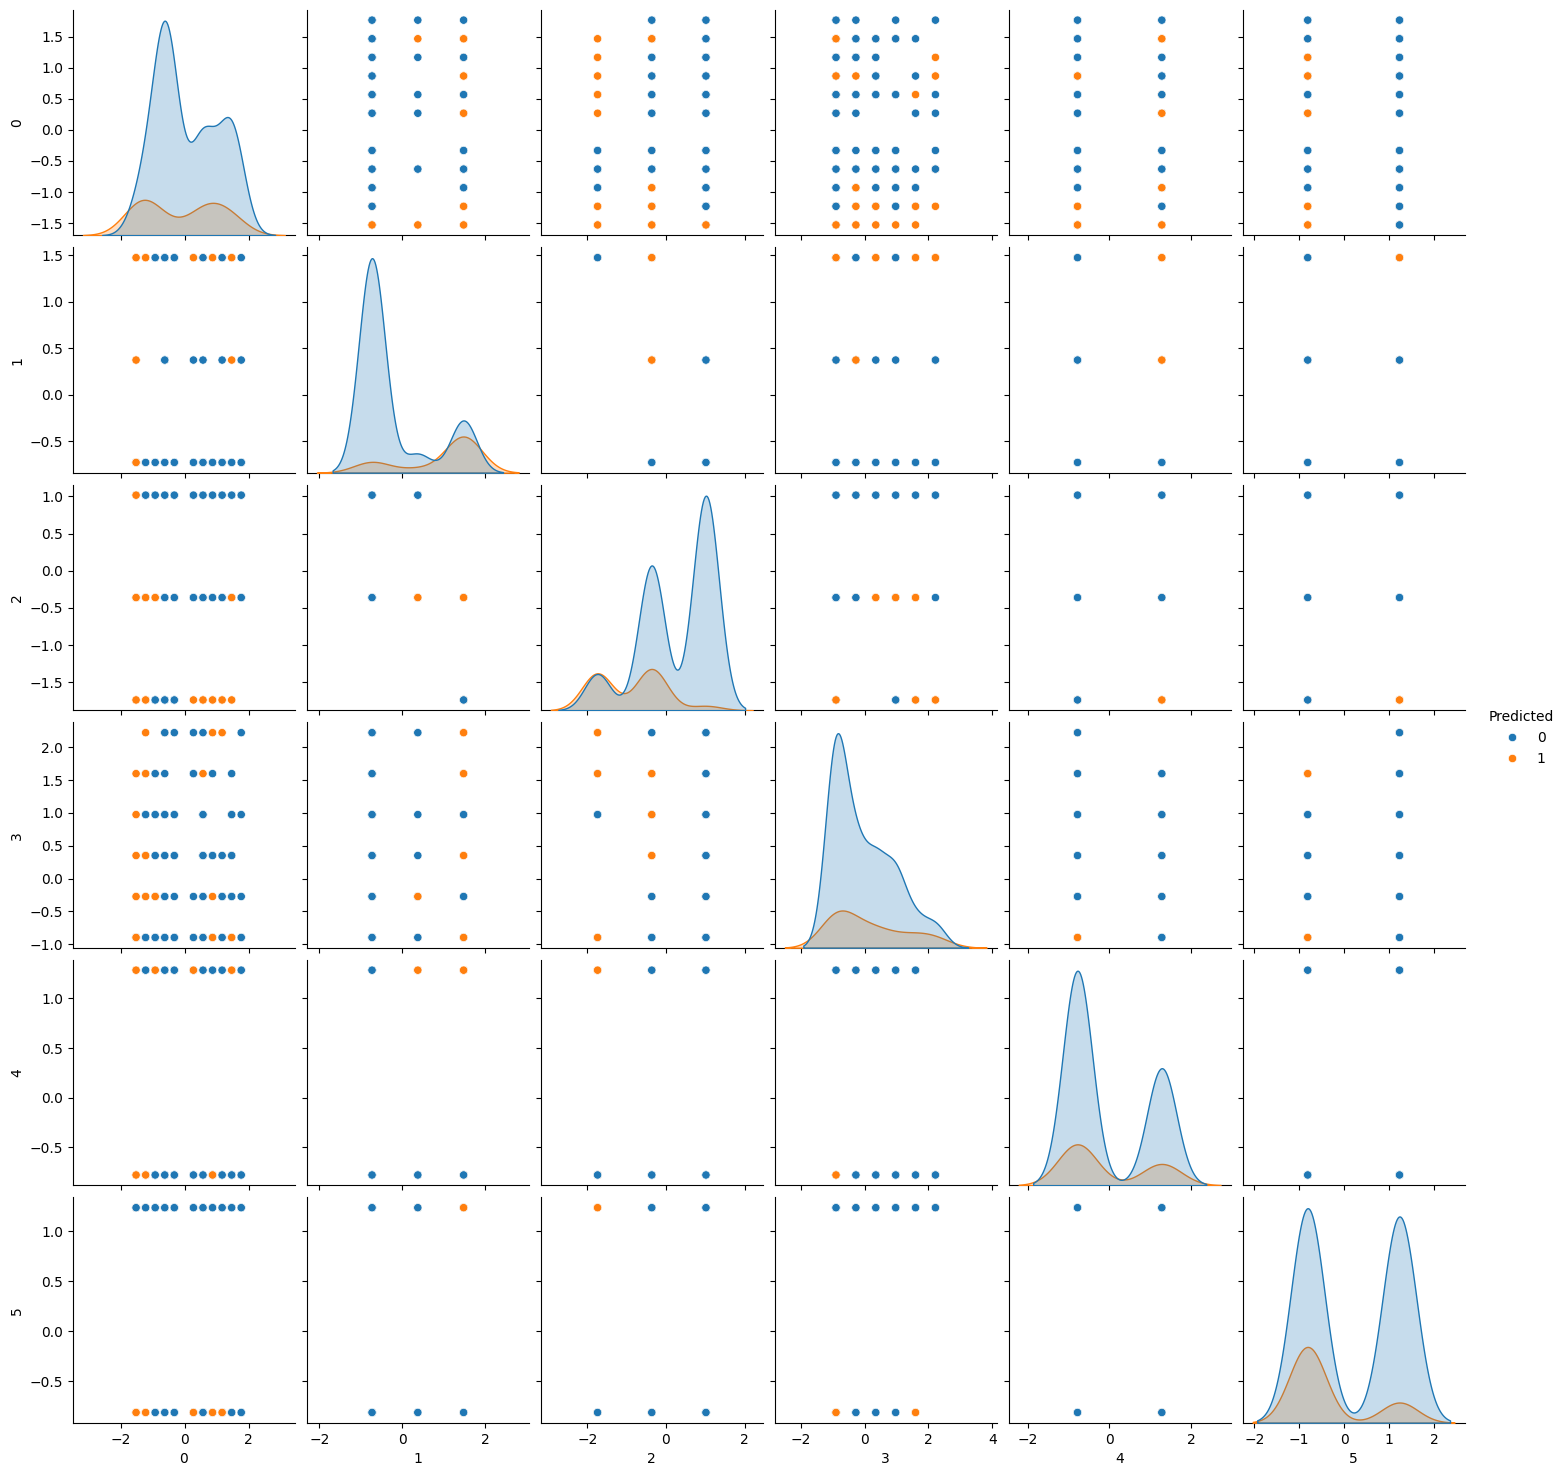

In [ ]:
sns.pairplot(df_svm, hue='Predicted')
plt.show()

The SVM algorithm attempts to classify customer churn (target variable) based on their features.
The goal is to create a robust and generalized classifier using hyperparameter tuning and evaluate its performance on unseen data

# K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNeighborsClassifier: Implements the KNN algorithm for classification.
GridSearchCV: Automates hyperparameter tuning by testing combinations of parameters

In [ ]:
param_grid_kn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
kn_grid = GridSearchCV(estimator=kn, param_grid=param_grid_kn, cv=5, scoring='accuracy', return_train_score=True, verbose=3)

Trains the KNN model by testing all hyperparameter combinations on the dataset (x, y).
Evaluates performance for each configuration and identifies the best one

In [ ]:
kn_grid.fit(x, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=(train=0.904, test=0.843) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=(train=0.916, test=0.864) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=(train=0.919, test=0.880) total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=(train=0.925, test=0.838) total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, p=1, weights=uniform;, score=(train=0.910, test=0.863) total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=(train=0.941, test=0.885) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=(train=0.952, test=0.874) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, p=1, weights=distance;, score=(train=0.946, test=0

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
kn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [ ]:
kn_grid.best_score_

0.8825902452466245

In [ ]:
best_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=7, p=1, weights='distance' )

Tests the model on the training data to evaluate overfitting.
Significant discrepancies between training and testing performance suggest overfitting

In [ ]:
best_knn.fit(x_train, y_train)
y_pred_test_knn = best_knn.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       153
           1       0.73      0.58      0.65        38

    accuracy                           0.87       191
   macro avg       0.82      0.76      0.79       191
weighted avg       0.87      0.87      0.87       191



In [ ]:
y_pred_train_knn = best_knn.predict(x_train)
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       577
           1       0.96      0.82      0.88       186

    accuracy                           0.95       763
   macro avg       0.95      0.91      0.93       763
weighted avg       0.95      0.95      0.95       763



In [ ]:
df_knn = pd.DataFrame(x_test)
df_knn['Predicted'] = y_pred_test_knn

sualizes relationships between features, colored by the predicted class.
Useful for assessing how well the model separates the data visually

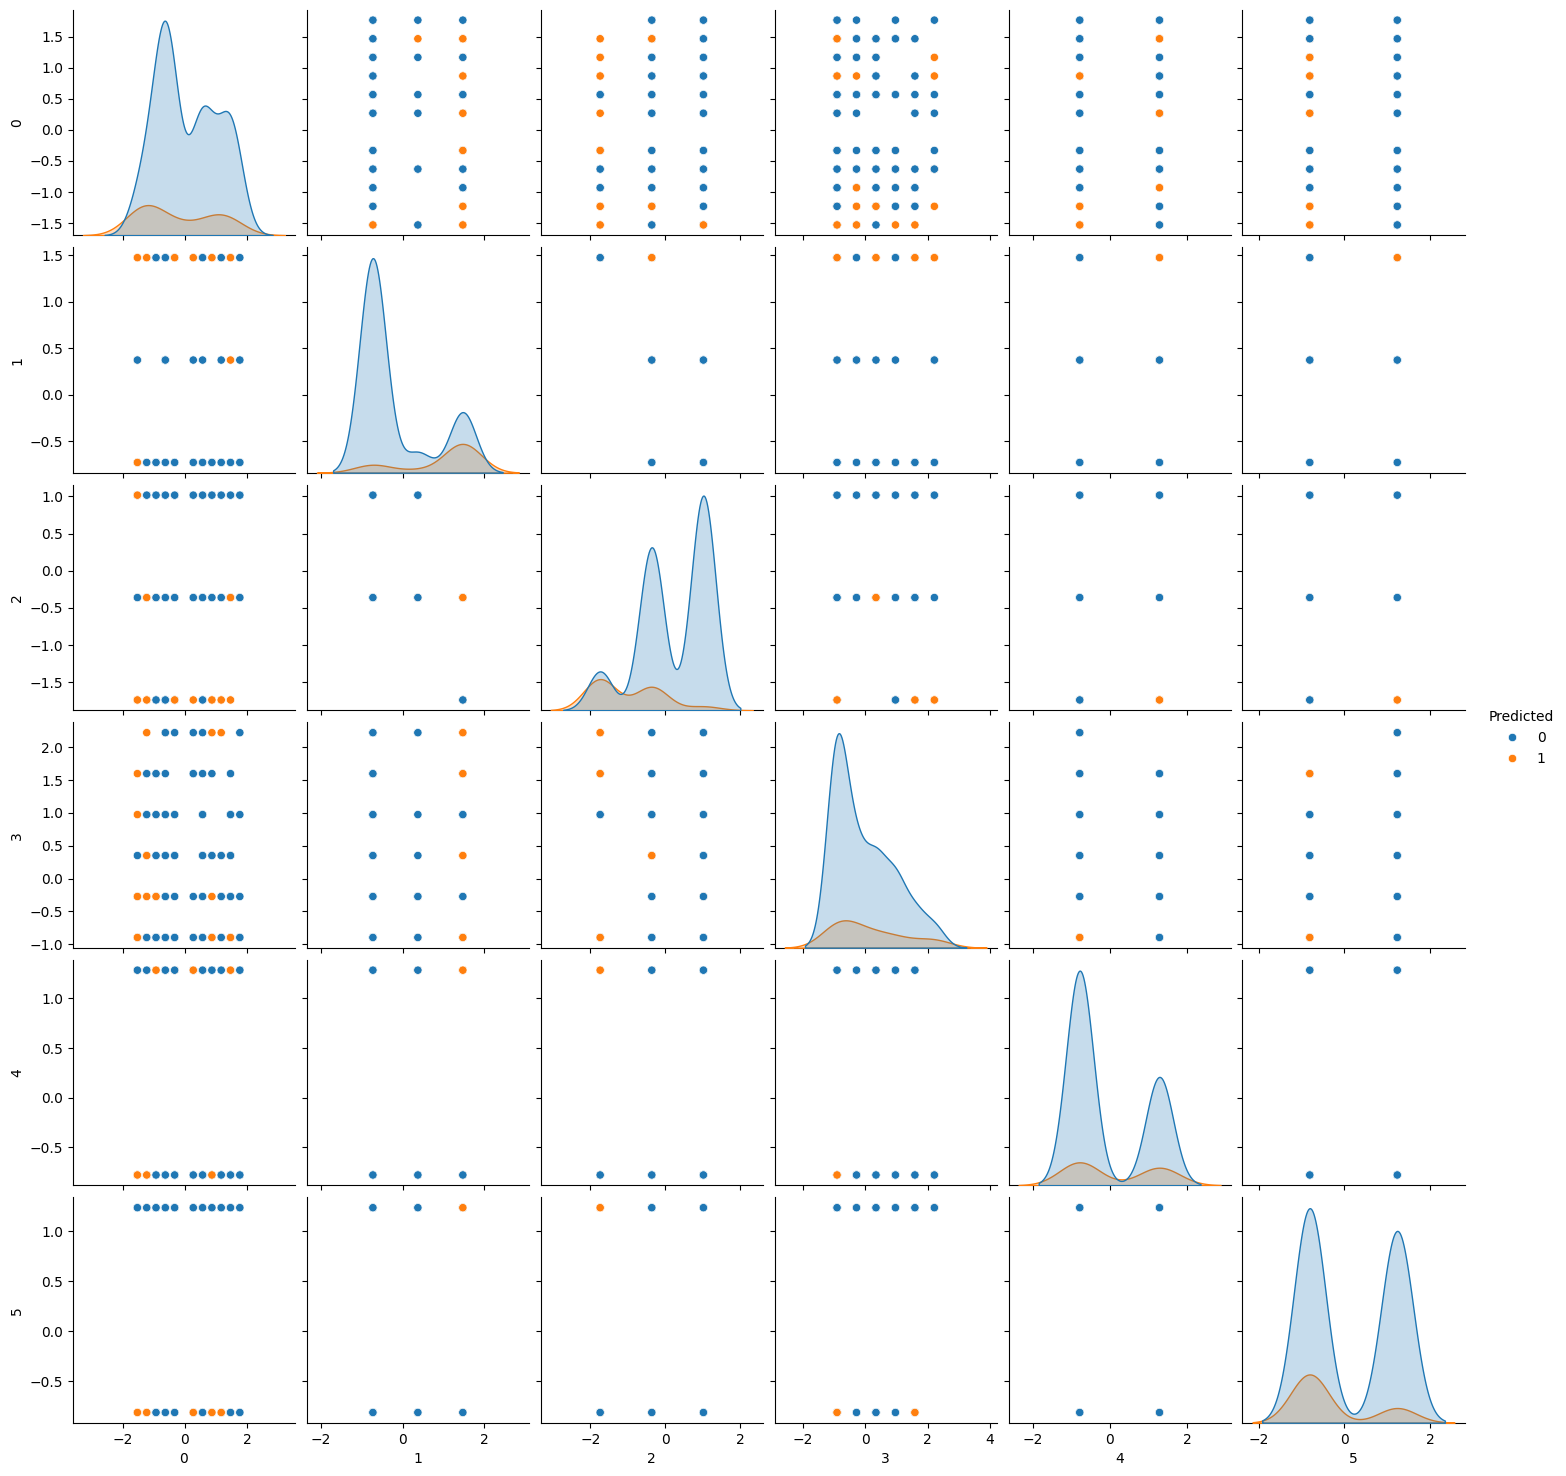

In [ ]:
sns.pairplot(df_knn, hue='Predicted')
plt.show()

Define a hyperparameter grid (n_neighbors, weights, etc.).
Use GridSearchCV for hyperparameter tuning and model evaluation.
Train the optimal KNN model using the best parameters.
Evaluate the model on both test and training datasets using classification metrics.
Visualize the results with pair plots.
Key Takeaway: KNN predicts the label for a data point based on the labels of its nearest neighbors. Its performance depends heavily on the choice of hyperparameters like n_neighbors and metric

# Decision Tree Classifier

Interpretability: Decision trees are easy to understand and visualize.
Non-linearity: Can handle non-linear data well.
No scaling required: They don't require feature scaling (standardization)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

The topmost node in the tree.
It splits the dataset based on a feature, chosen to best divide the data into separate classes.
This is done using criteria like Gini Impurity or Entropy (for classification), or Mean Squared Error (for regression)

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', return_train_score=True, verbose=3)

In [ ]:
dt_grid.fit(x, y)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END ccp_alpha=0.1, criterion=log_loss, max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.765, test=0.764) total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=log_loss, max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.776, test=0.764) total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=log_loss, max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.775, test=0.770) total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=log_loss, max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=(train=0.765, test=0.764) total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=log_loss, max_depth=None, max_features=sqrt, max_leaf_nodes=20, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=3)

best_params_: The hyperparameter combination that yields the highest accuracy.
best_score_: Corresponding cross-validation accuracy

In [ ]:
dt_grid.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
dt_grid.best_score_

0.9014549462661892

In [ ]:
best_dt = DecisionTreeClassifier(ccp_alpha=0.0, criterion='log_loss', max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=2, min_samples_split=2, splitter='best')

In [ ]:
best_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=20, max_leaf_nodes=50,
                       min_samples_leaf=2)

In [ ]:
dt.fit(x_train, y_train)
y_pred_test_dt = best_dt.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       153
           1       0.89      0.66      0.76        38

    accuracy                           0.92       191
   macro avg       0.91      0.82      0.85       191
weighted avg       0.91      0.92      0.91       191



Overfitting: If the tree is too deep, it may overfit the data

In [ ]:
y_pred_train_dt = best_dt.predict(x_train)
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       577
           1       0.94      0.76      0.84       186

    accuracy                           0.93       763
   macro avg       0.93      0.87      0.90       763
weighted avg       0.93      0.93      0.93       763



In [ ]:
df_dt = pd.DataFrame(x_test)
df_dt['Predicted'] = y_pred_test_dt

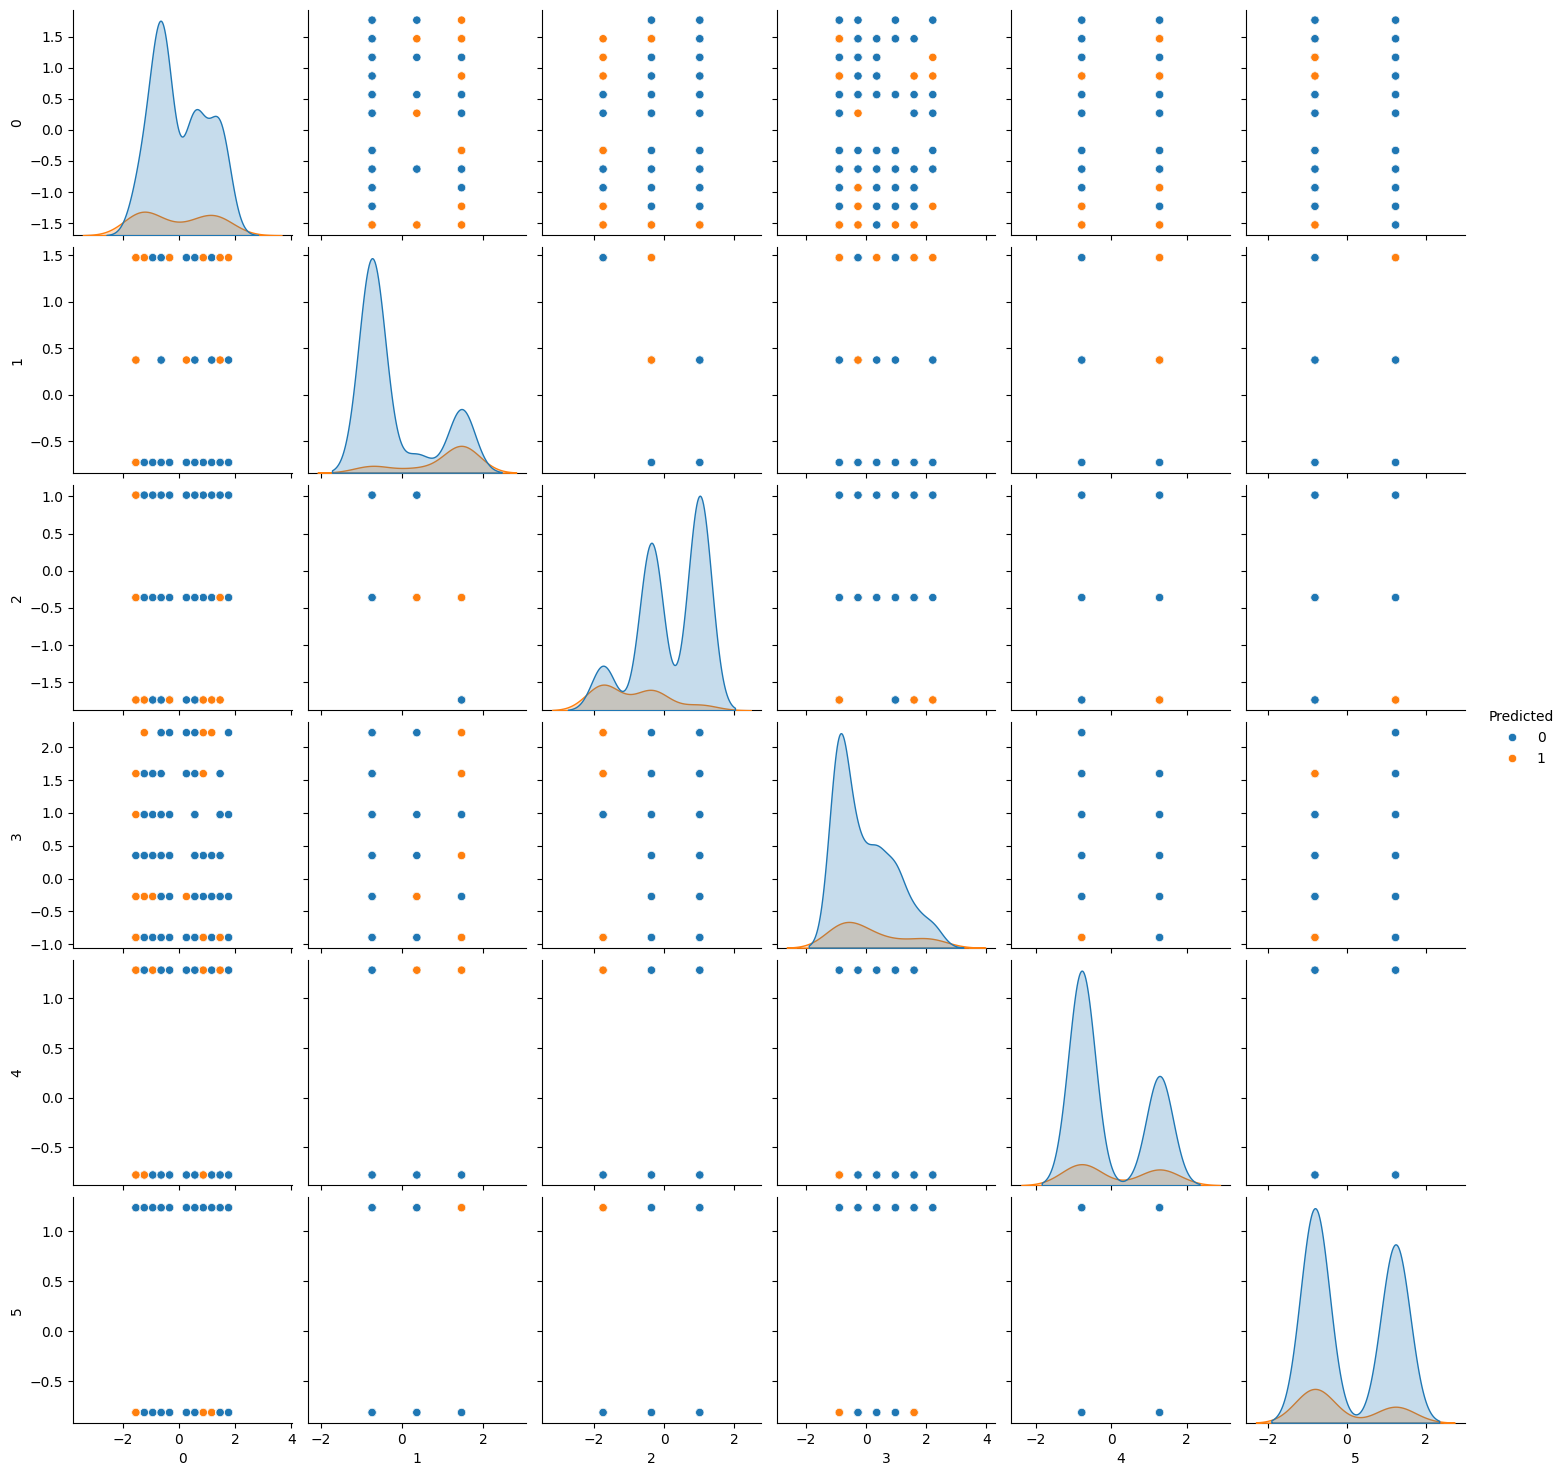

In [ ]:
sns.pairplot(df_dt, hue='Predicted')
plt.show()

In [ ]:
from sklearn.tree import plot_tree

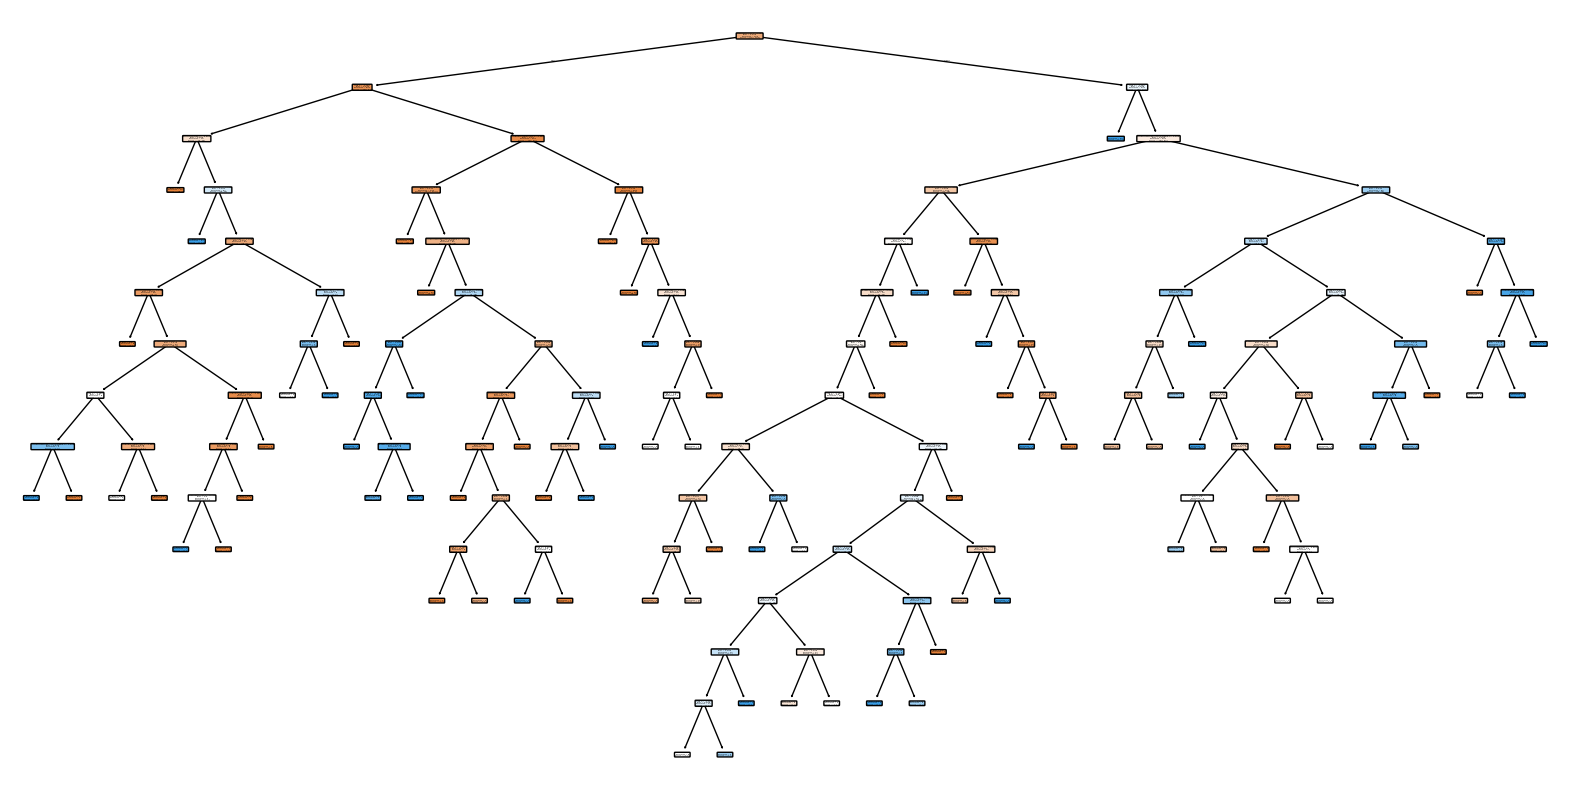

In [ ]:
column_names = df.columns.tolist()

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, rounded=True, feature_names=column_names)
plt.show()

A Decision Tree Classifier works by recursively splitting the data into subsets based on feature values, aiming to improve classification purity at each step. It creates a tree where each branch corresponds to a decision and each leaf represents a predicted class. The algorithm chooses the best feature to split based on criteria like Gini Impurity or Entropy. After constructing the tree, pruning is done to avoid overfitting, and regularization techniques help control tree complexity. Although decision trees are intuitive and effective, they can be prone to overfitting and instability without proper tuning.

# Random Forest Classifier

this AI will work alomost like decition tree by chooing the most effective

features

the only diffrence is that the random forest has more basic feature

after that it will stor the datas by the less efective features

also we can see shap the decision tree by writing a code

after that it will show us a palet

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RandomForestClassifier: Implements the Random Forest algorithm, which builds multiple decision trees and aggregates their predictions.
GridSearchCV: Automates hyperparameter tuning by testing combinations of parameters

In [ ]:
param_grid_rfc = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

n_estimators: Number of decision trees in the forest.
max_depth: Maximum depth of each tree. Restricting depth can reduce overfitting.
min_samples_split: Minimum samples required to split an internal node.
min_samples_leaf: Minimum samples required at a leaf node.
max_features: Number of features to consider when splitting a node:
sqrt: Square root of the total features.
log2: Log base 2 of the total features.
bootstrap: Whether to use bootstrapping (sampling with replacement) when building trees.
criterion: Function to measure the quality of a split:
gini: Gini impurity.
entropy: Information gain

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_grid = GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,cv=5,scoring='accuracy')

In [ ]:
rfc_grid.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

best_params_: The hyperparameter combination that yields the highest accuracy.
best_score_: Corresponding cross-validation accuracy

In [ ]:
rfc_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
rfc_grid.best_score_

0.9025130890052356

In [ ]:
best_rfc = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=10,max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50)

predict: Generates predictions for the test dataset.
classification_report:
Provides evaluation metrics such as precision, recall, F1-score, and accuracy for test predictions.

In [ ]:
best_rfc.fit(x_train, y_train)
y_pred_test_rfc = best_rfc.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       153
           1       0.76      0.68      0.72        38

    accuracy                           0.90       191
   macro avg       0.84      0.82      0.83       191
weighted avg       0.89      0.90      0.89       191



In [ ]:
y_pred_train_rfc = best_rfc.predict(x_train)
print(classification_report(y_train,y_pred_train_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       577
           1       0.90      0.82      0.86       186

    accuracy                           0.93       763
   macro avg       0.92      0.89      0.91       763
weighted avg       0.93      0.93      0.93       763



In [ ]:
df_rfc = pd.DataFrame(x_test)
df_rfc['Predicted'] = y_pred_test_rfc

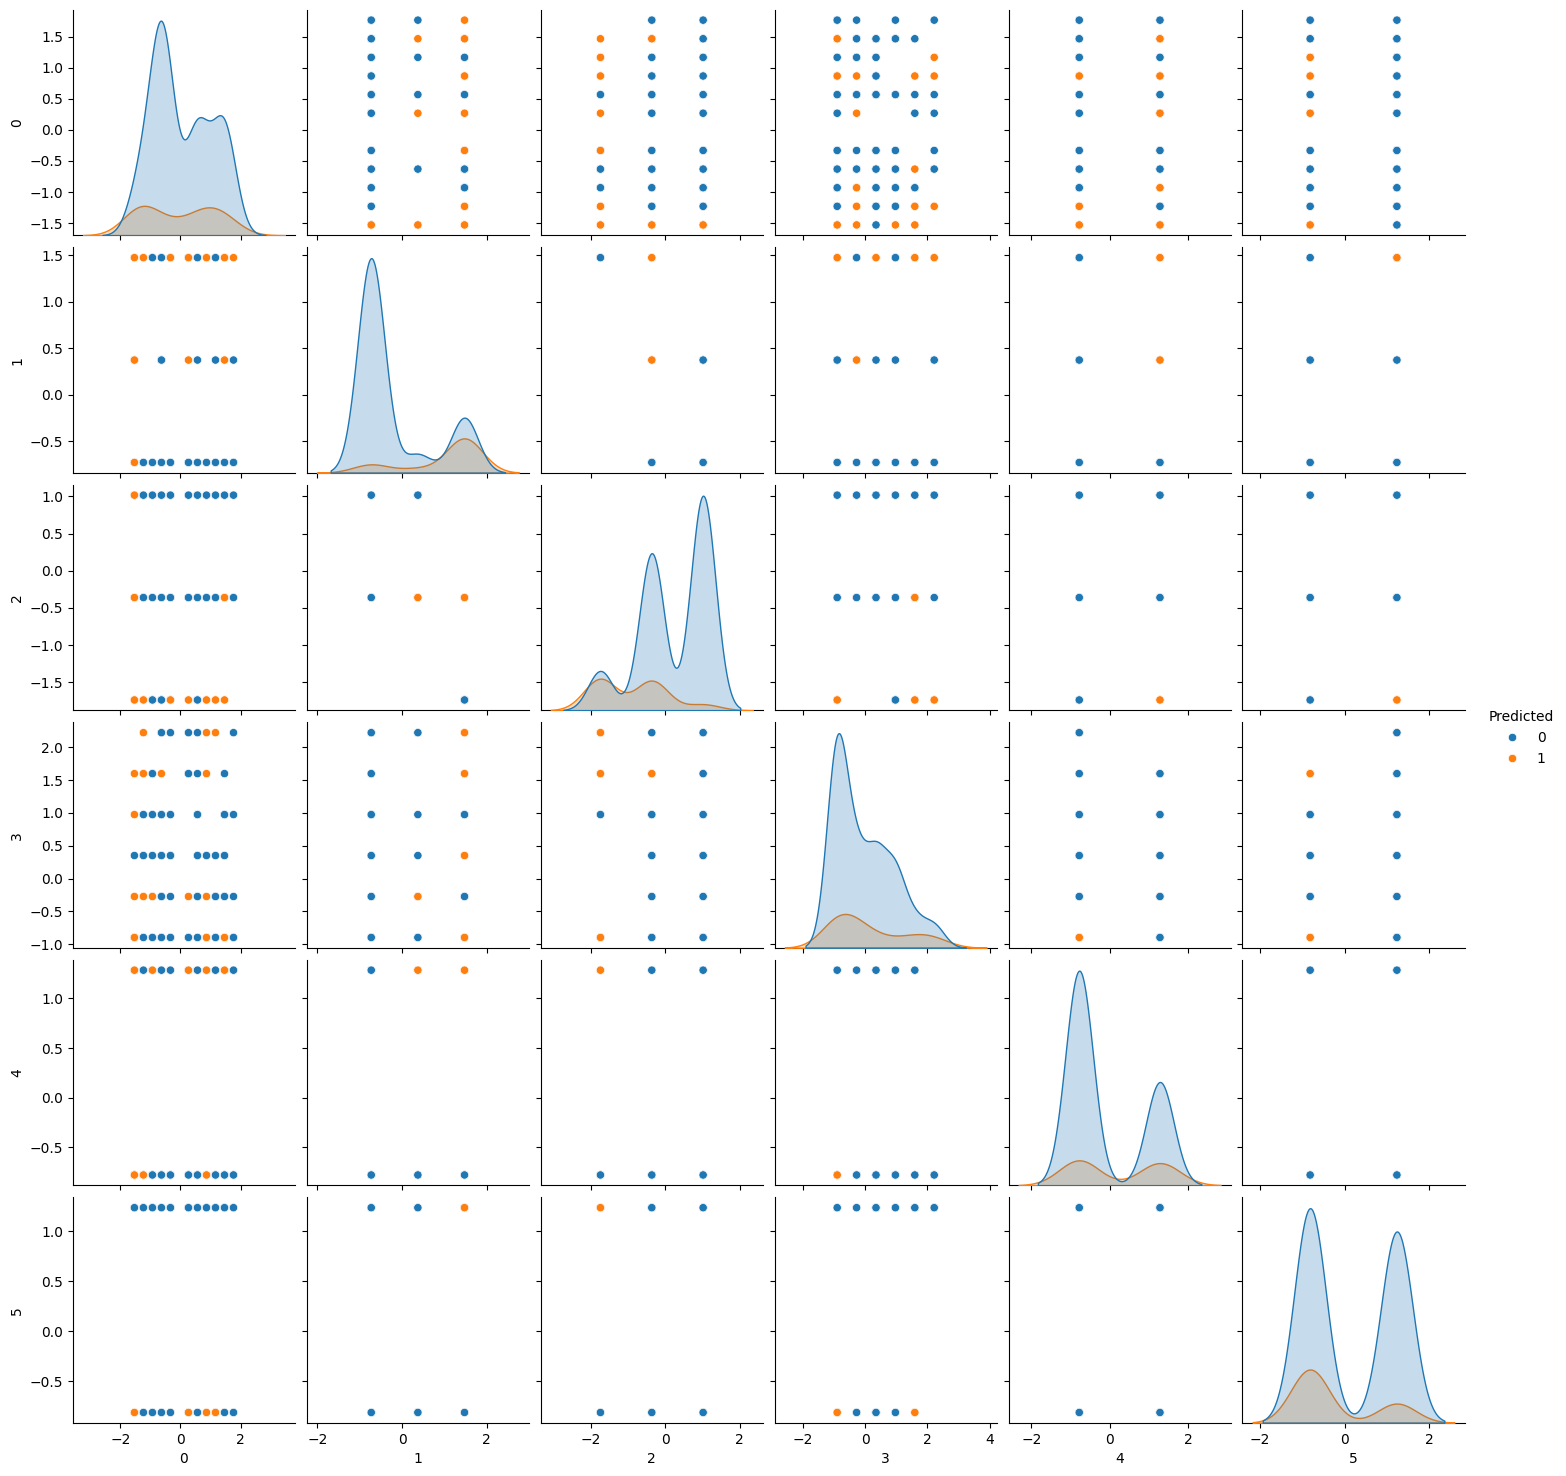

In [ ]:
sns.pairplot(df_rfc, hue='Predicted')
plt.show()

Define hyperparameters like n_estimators, max_depth, and criterion in a grid.
Apply GridSearchCV for hyperparameter tuning and validation.
Train the optimal Random Forest model using the best parameters.
Evaluate the model using classification metrics on both training and test datasets.
Visualize the results with pair plots.
Key Takeaway: Random Forest is a robust ensemble method that reduces overfitting by averaging predictions from multiple decision trees. Its performance relies on the effective selection of hyperparameters like the number of trees (n_estimators) and tree depth (max_depth)

#MLP


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

MLPClassifier: Implements a feedforward neural network.
GridSearchCV: Used for hyperparameter tuning by testing various configurations

In [19]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['logistic'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'early_stopping': [True],
}

hidden_layer_sizes: Specifies the number and size of layers.
activation: Activation function for hidden layers:
identity: No transformation.
logistic: Sigmoid function.
tanh: Hyperbolic tangent.
relu: Rectified Linear Unit.
solver: Optimization algorithm:
lbfgs: Limited-memory BFGS (faster for smaller datasets).
sgd: Stochastic Gradient Descent.
adam: Adaptive Moment Estimation (default and efficient).
alpha: Regularization parameter to prevent overfitting.
learning_rate: Adjusts step size during optimization.
max_iter: Maximum number of iterations for training.
batch_size: Number of samples per gradient update.
momentum: Momentum for weight updates in SGD.
early_stopping: Stops training if validation score doesn't improve

In [20]:
mlp = MLPClassifier()

In [21]:
mlp_grid = GridSearchCV(estimator=mlp,param_grid=param_grid_mlp,cv=5,scoring='accuracy')

Trains the MLP model by testing all hyperparameter combinations.
Identifies the configuration with the best accuracy

In [22]:
mlp_grid.fit(x,y)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic'], 'early_stopping': [True],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50), (100, 100)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam']},
             scoring='accuracy')

best_params_: The hyperparameter combination that yields the highest accuracy.
best_score_: Corresponding cross-validation accuracy

In [23]:
mlp_grid.best_params_

{'activation': 'logistic',
 'early_stopping': True,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.1,
 'solver': 'adam'}

In [24]:
mlp_grid.best_score_

0.8228658032515845

In [31]:
best_mlp = MLPClassifier(activation='logistic', early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate='adaptive', learning_rate_init=0.1, solver='adam')

In [32]:
best_mlp.fit(x_train,y_train)

MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(50, 50), learning_rate='adaptive',
              learning_rate_init=0.1)

In [35]:
y_pred_test_mlp = best_mlp.predict(x_test)
print(classification_report(y_test,y_pred_test_mlp))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       153
           1       0.53      0.68      0.60        38

    accuracy                           0.82       191
   macro avg       0.72      0.77      0.74       191
weighted avg       0.84      0.82      0.82       191



Evaluates predictions on the training dataset.
Identifies potential overfitting if training accuracy is much higher than test accuracy

In [36]:
y_pred_train_mlp = best_mlp.predict(x_train)
print(classification_report(y_train,y_pred_train_mlp))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       577
           1       0.58      0.61      0.60       186

    accuracy                           0.80       763
   macro avg       0.73      0.74      0.73       763
weighted avg       0.80      0.80      0.80       763



Combines test features with predicted labels.
Uses sns.pairplot to visualize feature relationships and class separation

In [37]:
df_mlp = pd.DataFrame(x_test)
df_mlp['Predicted'] = y_pred_test_mlp

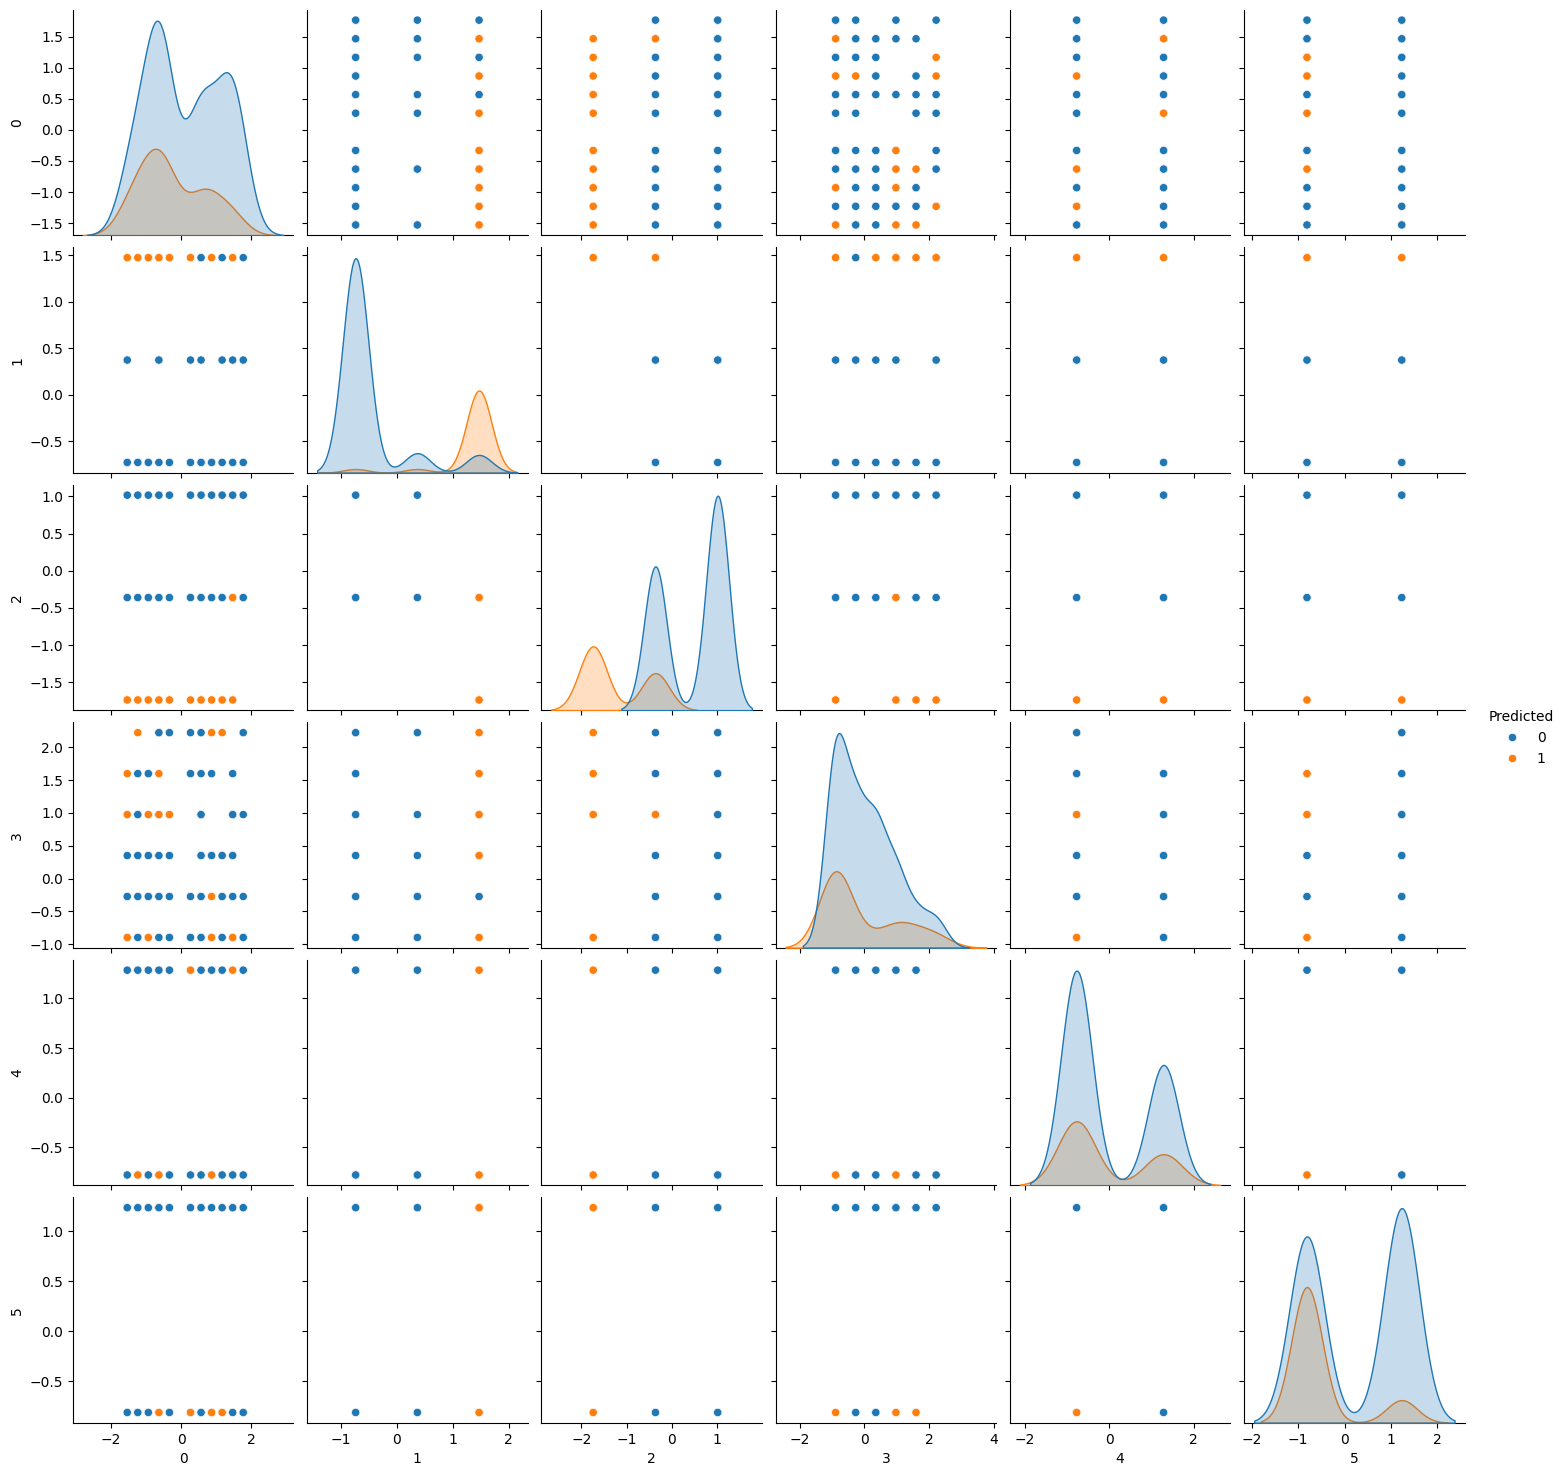

In [38]:
sns.pairplot(df_mlp, hue='Predicted')

Define hyperparameters such as hidden_layer_sizes, activation, and solver.
Use GridSearchCV for hyperparameter tuning with cross-validation.
Train the best MLP model using the optimal configuration.
Evaluate model performance on both training and test datasets using classification metrics.
Visualize results with pair plots for interpretability.
Key Takeaway:
MLP Classifier is a powerful method capable of capturing complex relationships in data.
Proper tuning of parameters such as network architecture (hidden_layer_sizes) and learning rate (learning_rate_init) is crucial for achieving optimal performance.

#LOG


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Logistic Regression models the probability of a binary outcome (e.g., 0 or 1, True or False).
It uses a logistic (sigmoid) function to map predicted values between 0 and 1.
The goal is to find the best-fitting model that can predict the probability of the binary outcome for any input feature

In [49]:
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
    'fit_intercept': [True, False],
    'class_weight': ['balanced'],
}

In [50]:
log = LogisticRegression()

In [51]:
log_grid = GridSearchCV(estimator=log,param_grid=param_grid_log,cv=5,scoring='accuracy')

In [52]:
log_grid.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

best_params_: The hyperparameter combination that yields the highest accuracy.
best_score_: Corresponding cross-validation accuracy

In [53]:
log_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'solver': 'newton-cg'}

In [54]:
log_grid.best_score_

0.7735574538440342

In [56]:
best_log = LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=True, solver='newton-cg')

In [57]:
best_log.fit(x_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cg')

In [58]:
y_pred_test_log = best_log.predict(x_test)

In [59]:
print(classification_report(y_test,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       153
           1       0.46      0.79      0.58        38

    accuracy                           0.77       191
   macro avg       0.70      0.78      0.71       191
weighted avg       0.84      0.77      0.79       191



In [61]:
y_pred_train_log = best_log.predict(x_train)

In [62]:
print(classification_report(y_train,y_pred_train_log))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       577
           1       0.52      0.76      0.61       186

    accuracy                           0.77       763
   macro avg       0.71      0.76      0.72       763
weighted avg       0.81      0.77      0.78       763



Logistic Regression is a classification algorithm that predicts the probability of a binary outcome using a logistic (sigmoid) function. It models the relationship between input features and the log-odds of the output, and is trained by minimizing a loss function (log-loss) using optimization techniques like gradient descent. Regularization techniques help avoid overfitting, and the model can be extended to multiclass problems. Logistic regression is efficient, interpretable, and widely used, but its performance depends on the assumption of linearity and feature independence.